# SK01 - Lineare Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Erzeugung von Testdaten

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples= 100, n_features= 1, noise = 10)

### Visualisierung

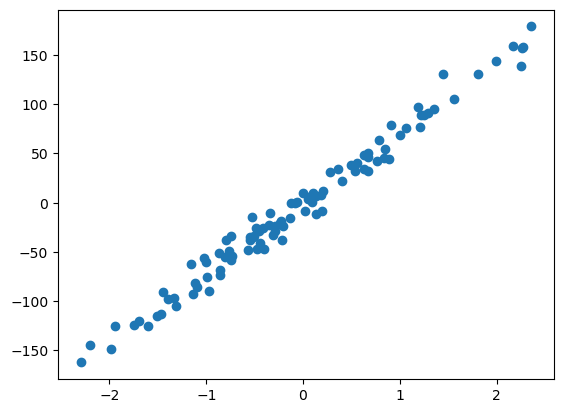

In [3]:
plt.scatter(X,y);

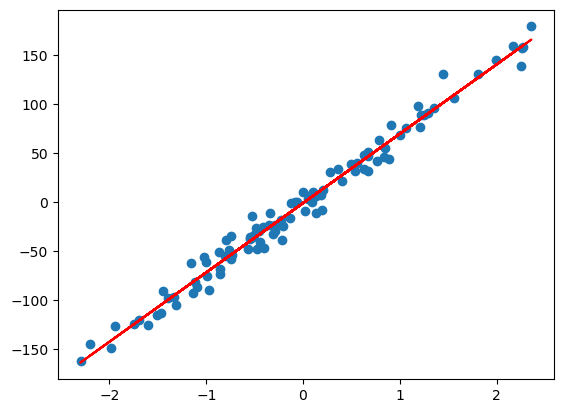

In [4]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(X,y)

plt.plot(X,lg.predict(X),'r-')
plt.scatter(X,y);

In [5]:
print(lg.coef_)

[70.62509913]
